# Project 2 - Churn - Pycaret

- Modelling Churn Prediction with **Pycaret**

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 2 -           Churn
- Date :                September 2024
- File(ipynb) :         3/4

## Step 1 : Install required libraries

In [1]:
# install full version
!pip install wandb joblib
!pip install pycaret[full] autoviz

## Step 2 : Import required libraries

In [2]:
import pandas as pd
import wandb

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 3 : Load and Prepare data

- Load the dataset

In [3]:
# Load dataset
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 2 : Churn/datasets/cleaned_IT_customer_churn.csv'
# dataset_path = r'C:/Users/Afshin/Desktop/10_Projects/Project_2_Churn/datasets/changed_IT_customer_churn.csv'

df = pd.read_csv(dataset_path)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Step 4 : Set Up the PyCaret Environment
Initialize in PyCaret

- extract the columns with object, number, bool datatypes

In [4]:
# Identify feature types
numeric_features = df.select_dtypes(include=['number']).columns.tolist()[:-1]
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f'> Numeric Features     is {numeric_features}')
print(f'> Boolean Features     is {boolean_features}')
print(f'> Categorical Features is {categorical_features}')

> Numeric Features     is ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
> Boolean Features     is []
> Categorical Features is ['InternetService', 'Contract', 'PaymentMethod']


In [5]:
# init setup
from pycaret.classification import *

# Set up the classification problem in PyCaret
# Note: specify the column names according to your actual dataset
classification_setup = setup(
    data= df,
    target= 'Churn',
    train_size= 0.8,
    fix_imbalance=True,
    remove_outliers = True,
    normalize= True,  # Enable normalization
    numeric_features= numeric_features,
    categorical_features= categorical_features,
    log_experiment= 'wandb',
    experiment_name= 'Churn_Pycaret_WandB',
    session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7010, 20)"
4,Transformed data shape,"(9138, 27)"
5,Transformed train set shape,"(7736, 27)"
6,Transformed test set shape,"(1402, 27)"
7,Numeric features,16
8,Categorical features,3
9,Preprocess,True


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: ERROR API key must be 40 characters long, yours was 42


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


 ··········


## Step 5 : Train
Training in PyCaret

In [6]:
# compare baseline models
top3_models = compare_models(n_select= 3, sort='Prec.')
top3_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7907,0.8313,0.5337,0.6213,0.5730,0.4358,0.4386,13.0390
gbc,Gradient Boosting Classifier,0.7928,0.8390,0.5808,0.6156,0.5971,0.4579,0.4587,2.1090
lightgbm,Light Gradient Boosting Machine,0.7858,0.8262,0.5196,0.6122,0.5612,0.4211,0.4241,2.5900
rf,Random Forest Classifier,0.7833,0.8154,0.5034,0.6106,0.5506,0.4100,0.4140,1.6900
xgboost,Extreme Gradient Boosting,0.7787,0.8169,0.5196,0.5946,0.5529,0.4072,0.4098,3.4170
ada,Ada Boost Classifier,0.7848,0.8357,0.6144,0.5902,0.6020,0.4546,0.4548,1.0870
et,Extra Trees Classifier,0.7700,0.7900,0.4886,0.5789,0.5282,0.3781,0.3813,1.4780
lr,Logistic Regression,0.7468,0.8380,0.7840,0.5148,0.6212,0.4431,0.4657,1.3840
ridge,Ridge Classifier,0.7395,0.8340,0.7867,0.5058,0.6154,0.4323,0.4568,0.3920
lda,Linear Discriminant Analysis,0.7389,0.8340,0.7867,0.5051,0.6149,0.4314,0.4560,0.7640


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

## Step 6 : Optimize
Optimization in PyCaret

- Tune **models**

In [7]:
# tune model
tuned_top3_models = [tune_model(model, choose_better= True) for model in top3_models]
tuned_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8111,0.8425,0.5676,0.6667,0.6131,0.4892,0.4920
1,0.7986,0.8569,0.5473,0.6378,0.5891,0.4567,0.4591
2,0.7950,0.8287,0.5302,0.6371,0.5788,0.4448,0.4481
3,0.7825,0.8181,0.4899,0.6134,0.5448,0.4043,0.4087
4,0.8075,0.8618,0.6107,0.6454,0.6276,0.4979,0.4983
5,0.8021,0.8411,0.5570,0.6484,0.5993,0.4689,0.4713
6,0.7754,0.8227,0.5235,0.5865,0.5532,0.4038,0.4050
7,0.7879,0.8422,0.5570,0.6103,0.5825,0.4407,0.4415
8,0.7786,0.8046,0.4865,0.6000,0.5373,0.3939,0.3976


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7914,0.8465,0.6486,0.5963,0.6214,0.4778,0.4786
1,0.7914,0.8449,0.6284,0.6000,0.6139,0.4711,0.4713
2,0.7701,0.8205,0.5772,0.5658,0.5714,0.4143,0.4144
3,0.7790,0.8170,0.5638,0.5874,0.5753,0.4260,0.4262
4,0.8039,0.8644,0.6711,0.6211,0.6452,0.5100,0.5107
5,0.7861,0.8431,0.6577,0.5868,0.6203,0.4720,0.4735
6,0.7861,0.8342,0.6309,0.5912,0.6104,0.4632,0.4636
7,0.7932,0.8350,0.6913,0.5954,0.6398,0.4959,0.4986
8,0.7696,0.8087,0.5946,0.5605,0.5770,0.4190,0.4193


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7950,0.8472,0.5203,0.6364,0.5725,0.4395,0.4433
1,0.8021,0.8564,0.5338,0.6529,0.5874,0.4590,0.4630
2,0.7879,0.8248,0.5034,0.6250,0.5576,0.4202,0.4245
3,0.7825,0.8188,0.4899,0.6134,0.5448,0.4043,0.4087
4,0.8146,0.8624,0.6040,0.6667,0.6338,0.5101,0.5112
5,0.8075,0.8450,0.5570,0.6640,0.6058,0.4798,0.4830
6,0.7914,0.8329,0.5369,0.6250,0.5776,0.4402,0.4424
7,0.7861,0.8375,0.5436,0.6090,0.5745,0.4322,0.4335
8,0.7857,0.8142,0.5068,0.6148,0.5556,0.4161,0.4195


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
                n_estimators=260, n_jobs=-1, num_leaves=7

- **Ensemble model**


In [8]:
# ensemble model
bagged_top3_models = [ensemble_model(model, choose_better= True) for model in top3_models]
bagged_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8075,0.8398,0.5473,0.6639,0.6000,0.4748,0.4786
1,0.8111,0.8520,0.5743,0.6641,0.6159,0.4915,0.4938
2,0.7986,0.8216,0.5436,0.6429,0.5891,0.4569,0.4597
3,0.7736,0.8063,0.4497,0.5982,0.5134,0.3697,0.3761
4,0.8111,0.8613,0.6174,0.6525,0.6345,0.5072,0.5076
5,0.7986,0.8412,0.5638,0.6364,0.5979,0.4642,0.4657
6,0.7772,0.8180,0.4899,0.5984,0.5387,0.3938,0.3972
7,0.7843,0.8285,0.5436,0.6045,0.5724,0.4288,0.4298
8,0.7750,0.8084,0.4730,0.5932,0.5263,0.3812,0.3854


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8004,0.8503,0.5811,0.6324,0.6056,0.4723,0.4731
1,0.7950,0.8555,0.5878,0.6170,0.6021,0.4641,0.4644
2,0.7843,0.8287,0.5705,0.5986,0.5842,0.4387,0.4389
3,0.7825,0.8184,0.5101,0.6080,0.5547,0.4123,0.4151
4,0.8004,0.8628,0.6107,0.6276,0.6190,0.4838,0.4839
5,0.8004,0.8456,0.6040,0.6294,0.6164,0.4816,0.4818
6,0.7879,0.8324,0.5839,0.6042,0.5939,0.4504,0.4505
7,0.7825,0.8440,0.6242,0.5849,0.6039,0.4542,0.4547
8,0.7804,0.8084,0.5405,0.5926,0.5654,0.4188,0.4196


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8146,0.8374,0.5270,0.6964,0.6000,0.4823,0.4903
1,0.8111,0.8502,0.5676,0.6667,0.6131,0.4892,0.4920
2,0.7879,0.8190,0.5034,0.6250,0.5576,0.4202,0.4245
3,0.7754,0.8099,0.4698,0.5983,0.5263,0.3819,0.3867
4,0.8146,0.8653,0.6107,0.6642,0.6364,0.5123,0.5131
5,0.7950,0.8344,0.5235,0.6393,0.5756,0.4423,0.4461
6,0.7807,0.8197,0.5235,0.6000,0.5591,0.4141,0.4158
7,0.7665,0.8212,0.4966,0.5692,0.5305,0.3760,0.3776
8,0.7714,0.8072,0.4595,0.5862,0.5152,0.3685,0.3732


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[BaggingClassifier(bootstrap=True, bootstrap_features=False,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7d7a7b7cb9d0>,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=123, verbose=0,
                   warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 BaggingClassifier(bootstrap=T

In [9]:
# ensemble model
boosted_top3_models = [ensemble_model(model, method= 'Boosting', choose_better= True) for model in top3_models]
boosted_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7879,0.8018,0.4595,0.6355,0.5333,0.4006,0.4095
1,0.7968,0.8335,0.5608,0.6288,0.5929,0.4581,0.4594
2,0.7683,0.7976,0.4899,0.5748,0.5290,0.3766,0.3787
3,0.7629,0.7825,0.4228,0.5727,0.4865,0.3369,0.3434
4,0.7968,0.8323,0.5503,0.6357,0.5899,0.4558,0.4579
5,0.7683,0.8207,0.5034,0.5725,0.5357,0.3822,0.3836
6,0.7647,0.8059,0.4497,0.5726,0.5038,0.3525,0.3569
7,0.7522,0.7968,0.4832,0.5373,0.5088,0.3438,0.3446
8,0.7589,0.7895,0.4595,0.5528,0.5018,0.3446,0.3472


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8021,0.8263,0.5270,0.6555,0.5843,0.4564,0.4611
1,0.7861,0.8325,0.5135,0.6129,0.5588,0.4191,0.4220
2,0.7718,0.8037,0.4832,0.5854,0.5294,0.3806,0.3837
3,0.7790,0.7947,0.4295,0.6214,0.5079,0.3715,0.3820
4,0.7950,0.8439,0.5570,0.6288,0.5907,0.4547,0.4562
5,0.7932,0.8228,0.5772,0.6187,0.5972,0.4584,0.4589
6,0.7683,0.8146,0.4832,0.5760,0.5255,0.3738,0.3763
7,0.7807,0.8221,0.5235,0.6000,0.5591,0.4141,0.4158
8,0.7768,0.7903,0.4797,0.5966,0.5318,0.3876,0.3915


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7879,0.7897,0.4797,0.6283,0.5441,0.4091,0.4154
1,0.7932,0.8137,0.5676,0.6176,0.5915,0.4535,0.4542
2,0.7683,0.7814,0.4966,0.5736,0.5324,0.3794,0.3811
3,0.7701,0.7834,0.4631,0.5847,0.5169,0.3686,0.3730
4,0.7754,0.8254,0.5436,0.5827,0.5625,0.4117,0.4121
5,0.7629,0.8057,0.4966,0.5606,0.5267,0.3693,0.3705
6,0.7611,0.8002,0.4698,0.5600,0.5109,0.3545,0.3569
7,0.7469,0.7867,0.4631,0.5267,0.4929,0.3251,0.3263
8,0.7696,0.7858,0.4932,0.5748,0.5309,0.3794,0.3814


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lamb

- **Blend models**

In [11]:
# blend models
blender_top3_models = blend_models(tuned_top3_models, choose_better= True)
blender_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8093,0.8471,0.5541,0.6667,0.6052,0.4808,0.4844
1,0.7986,0.8564,0.5608,0.6336,0.5950,0.4616,0.4631
2,0.7879,0.8282,0.5436,0.6136,0.5765,0.4357,0.4371
3,0.7843,0.8204,0.5034,0.6148,0.5535,0.4132,0.4168
4,0.8039,0.8639,0.6040,0.6383,0.6207,0.4886,0.4890
5,0.8039,0.8459,0.5772,0.6466,0.6099,0.4795,0.4809
6,0.7843,0.8311,0.5503,0.6029,0.5754,0.4313,0.4321
7,0.7825,0.8433,0.5772,0.5931,0.5850,0.4377,0.4378
8,0.7750,0.8105,0.4932,0.5887,0.5368,0.3897,0.3924


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

- **Stack models**

In [12]:
# stack models
stacker_top3_models = stack_models(tuned_top3_models, choose_better= True)
stacker_top3_models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:26:48
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Original model was better than the stacked model, hence it will be returned. NOTE: The display metrics are for the stacked model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7950,0.8474,0.5743,0.6204,0.5965,0.4594,0.4600
1,0.7968,0.8563,0.6081,0.6164,0.6122,0.4746,0.4746
2,0.7861,0.8281,0.5772,0.6014,0.5890,0.4445,0.4447
3,0.7825,0.8206,0.5369,0.6015,0.5674,0.4228,0.4240
4,0.8057,0.8641,0.6510,0.6299,0.6403,0.5072,0.5074
5,0.7986,0.8468,0.6242,0.6200,0.6221,0.4848,0.4848
6,0.7790,0.8308,0.5839,0.5839,0.5839,0.4334,0.4334
7,0.7968,0.8430,0.6577,0.6087,0.6323,0.4922,0.4929
8,0.7821,0.8115,0.5541,0.5942,0.5734,0.4274,0.4279


LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

- **Automl**

In [13]:
automl_model = automl(optimize= 'Prec.')
automl_model

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [14]:
tuned_best_model = automl_model

## Step 7 : Analyze
Analysis and model explainability in PyCaret

- **Evaluate model**

In [15]:
# launch evaluate widget
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- **SHAP** Values


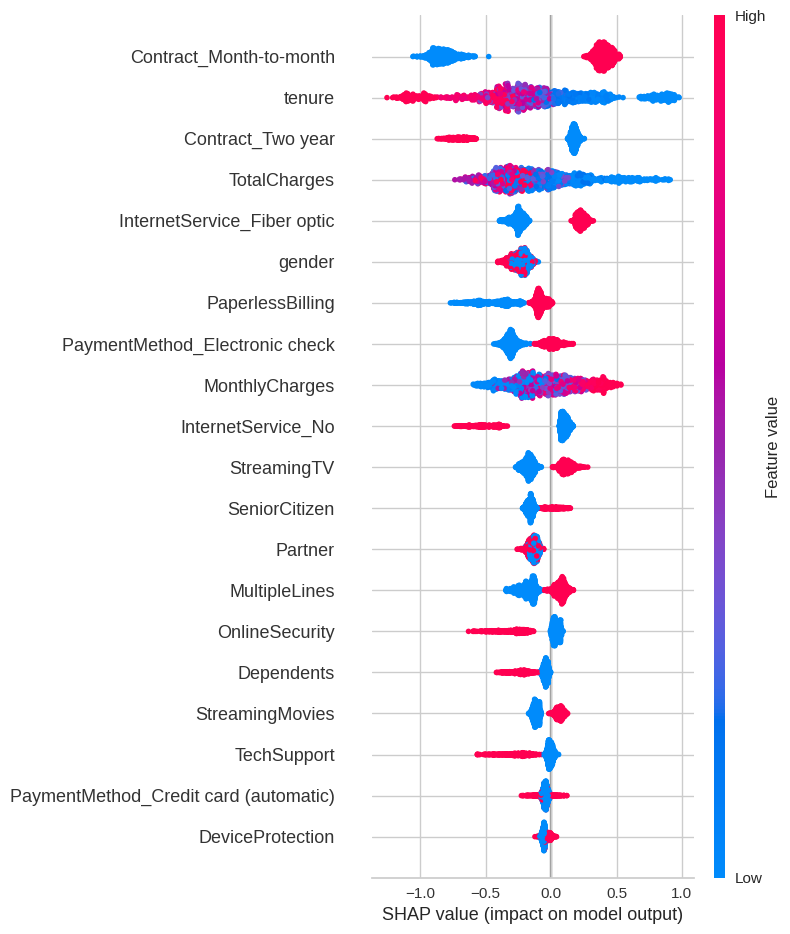

In [16]:
# interpret model
interpret_model(tuned_best_model)

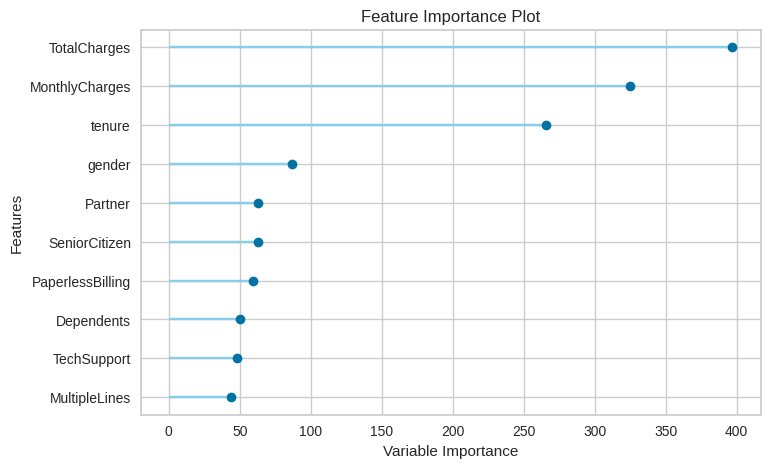

In [17]:
plot_model(tuned_best_model, plot = 'feature')

## Step 8 : Deploy

- **predict model**

In [18]:
# predict on hold-out
predict_model(tuned_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8031,0.8583,0.5849,0.6401,0.6113,0.4798,0.4807


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
5235,0,0,0,0,31,1,1,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,76.050003,2227.800049,0,1,0.5611
3426,0,0,1,1,71,1,1,DSL,1,1,...,1,1,Two year,1,Credit card (automatic),90.550003,6239.049805,0,0,0.9856
92,1,0,1,1,66,1,1,DSL,1,0,...,1,1,Two year,1,Mailed check,84.000000,5714.250000,0,0,0.9682
1185,1,0,0,0,38,1,1,Fiber optic,1,1,...,1,1,One year,1,Electronic check,104.849998,3887.250000,0,0,0.7225
1917,1,0,1,1,49,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,99.800003,4872.450195,1,1,0.5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0,0,1,1,72,1,1,DSL,1,1,...,1,0,Two year,0,Mailed check,74.550003,5430.649902,0,0,0.9888
5796,0,0,1,1,70,1,1,Fiber optic,1,1,...,1,1,Two year,1,Credit card (automatic),115.150002,8250.000000,0,0,0.9136
4227,1,0,1,1,46,1,0,No,0,0,...,0,0,Two year,0,Credit card (automatic),19.750000,856.500000,0,0,0.9847
2251,0,0,1,0,49,1,1,DSL,0,0,...,0,0,Month-to-month,1,Credit card (automatic),52.150002,2583.750000,0,0,0.7800


- **Finalize model**

In [19]:
# finalize a model
tuned_best_model_pipeline = finalize_model(tuned_best_model)
tuned_best_model_pipeline

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines',
                                             'OnlineSecurity', 'OnlineBackup',
                                             'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transf...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                                min_child_weight=0.001, min_split_gain=0.9,
                                n_estimators=260, n_jobs=-1, num_leaves=70,
                                objective=None, random_state=123, reg_alpha=2,
                                reg_lambda=3, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

- **Save model**

In [20]:
# save pipeline
# model_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_2_Churn\models\tuned_best_model_pycaret_wandb_LGBMClassifier'
model_path = '/content/drive/My Drive/Applied Machine Learning/Project 2 : Churn/models/tuned_best_model_pycaret_wandb_LGBMClassifier'

(model, filename) = save_model(tuned_best_model_pipeline, model_path)
print(f"> The tuned best pipeline Saved to {filename}")
model

Transformation Pipeline and Model Successfully Saved
> The tuned best pipeline Saved to /content/drive/My Drive/Applied Machine Learning/Project 2 : Churn/models/tuned_best_model_pycaret_wandb_LGBMClassifier.pkl


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines',
                                             'OnlineSecurity', 'OnlineBackup',
                                             'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transf...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                                min_child_weight=0.001, min_split_gain=0.9,
                                n_estimators=260, n_jobs=-1, num_leaves=70,
                                objective=None, random_state=123, reg_alpha=2,
                                reg_lambda=3, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

- **Load model**

In [21]:
# load pipeline
tuned_best_model_pipeline = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


- **Create app**

In [22]:
# create app
create_app(tuned_best_model_pipeline)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://237109f0f632cbf987.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Step 9 : Make Predictions

- Find a sample

In [25]:
sample = df.sample(1)
sample_pred = predict_model(tuned_best_model_pipeline, data= sample)
sample_price_pred = sample_pred[['Churn', 'prediction_label', 'prediction_score']]
sample_price_pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,Churn,prediction_label,prediction_score
5193,0,0,0.9843


- Get a sample

In [26]:
# Make predictions on new data
new_data = pd.DataFrame([{
  'gender' : 0,
  'SeniorCitizen' : 1,
  'Partner' : 1,
  'Dependents' : 0,
  'tenure' : 67,
  'PhoneService' : 1,
  'MultipleLines' : 1,
  'InternetService' : 'Fiber optic',
  'OnlineSecurity' : 1,
  'OnlineBackup' : 1,
  'DeviceProtection' : 1,
  'TechSupport' : 1,
  'StreamingTV' : 0,
  'StreamingMovies' : 1,
  'Contract' : 'One year',
  'PaperlessBilling' : 1,
  'PaymentMethod' : 'Credit card (automatic)',
  'MonthlyCharges' : 105.4,
  'TotalCharges' : 7035.6,
}])
new_data_pred = predict_model(tuned_best_model_pipeline, data= new_data)
new_data_pred[['prediction_label', 'prediction_score']]

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


,prediction_label,prediction_score
0,0,0.8135
